The trapezoidal rule is a basic integration method to solve the definite integral $\displaystyle\int_{a}^{b}f(x)\ dx \approx (b-a) \cdot \frac{1}{2}(f(a)+f(b))$, by approximating the region under the graph of the function $f(x)$ as a trapezoid and calculating its area. We divide the area into trapezoids instead of rectangles like with Reimann sums.

The expression above obviously approximates the entire function linearly, instead we'd like to break it up into multiple trapezoids (discretization factor $N$): $\\ \displaystyle\int_{a}^{b}f(x)\ dx \approx \sum_{k=1}^{N} \frac {f(x_{k-1}) + f(x_k)} {2} \Delta x_k$

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [126]:
def f(x):
    return -0.75 * np.power(x,3) + 10 * np.power(x,2) - 5 * x

x = np.linspace(0, 11, 100)
y = f(x)

In [122]:
def trapezoidal(f,a,b,N):
    x = np.linspace(a,b,N)
    return sum(((f(x[1:]) + f(x[:-1])) / 2) * (x[1:] - x[:-1]))

def error_analysis(f,a,b,N):
    return range(N), [trapezoidal(f, a, b, n) for n in range(N)]

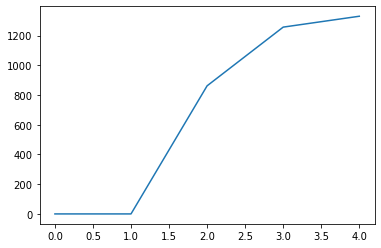

In [125]:
plt.plot(*error_analysis(f,0,11,5))

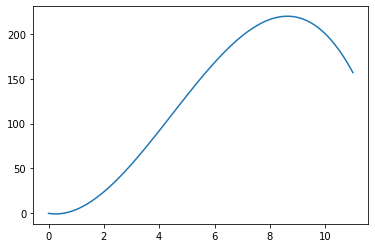

In [127]:
plt.plot(x,y)